# COVID-19 Infection curve analysis                                                                      
## Naoaki ONO nono@is.nasit.jp   

CoViD-19 infection curve (in Japan, from Jan. 15, 2020) analysis using R.

The numbers of infected and tested by PCR have been gathered from the website of Ministry of Health, Labour and Welfare, Japan

Sources and data are available on GitHub.
https://github.com/naono-git/covid19

Open using [nbviewer service](https://nbviewer.jupyter.org/github/naono-git/covid19/blob/master/covid19.nara.ipynb)


### Nara model

Tentative prediciton of infection in Nara prefecture based on Total and Kinki model.

In [1]:
library(date)
source("src/plotUtil.R")

First, we evaluate total Japan corona virus infection.

And assume the exponential model to evaluate the initial growth curve.

In [2]:
# covid <- read.delim("data/covid19.txt", header=TRUE, sep="\t")
covid <- read.delim("data/covid19.total.txt", header=TRUE, sep="\t")
nd <- nrow(covid)

covid.kyoto <- read.delim("data/covid19.kyoto.txt", header=TRUE, sep="\t")
covid.osaka <- read.delim("data/covid19.osaka.txt", header=TRUE, sep="\t")
covid.nara <- read.delim("data/covid19.nara.txt", header=TRUE, sep="\t")
covid.hyogo <- read.delim("data/covid19.hyogo.txt", header=TRUE, sep="\t")

pref47.infexted <- read.delim("data/pref47.infected.txt", header=TRUE, sep="\t")
pref47.recovered <- read.delim("data/pref47.infected.txt", header=TRUE, sep="\t")

population4 <- c(kyoto=2599, osaka=8823, nara=1348, hyogo=5503)

stamp <- paste(c(covid[nd,1],sprintf("%02d",covid[nd,2]),sprintf("%02d",covid[nd,3])),collapse="")
stamp

[1] "20200418"

In [3]:
ddd <- mdy.date(month=covid$mm, day=covid$dd, year=covid$yy)
d0  <- ddd[1]
dd1 <- ddd-d0 ## relative date starting from 2020/01/15                                                   
dd1[1] <- 7   ## initial offset (aribtrary chosen) 

In [4]:
## dates to plot ticks                                                                                    
mdlabel <- rbind(c(1,15),
                 c(2, 1),
                 c(2,15),
                 c(3, 1),
                 c(3,15),
                 c(4, 1),
                 c(4,15),
                 c(5, 1),
                 c(5,15),
                 c(6, 1),
                 c(6,15),
                 c(7, 1),
                 c(7,15)
                )
ddlabel <- apply(mdlabel,1,function(xx){
    mdy.date(xx[1],xx[2],2020)
})
## label to plot ticks                                                                                    
ticklabel <- apply(mdlabel,1,paste,collapse="/")

In [5]:
logd <- log(dd1)        ## log day
logi <- log(covid$i)    ## log number of infected                                                               
logp <- log(covid$PCR)  ## log number of PCR

In [6]:
daydiff <- function(xx){
    return(xx - c(0,xx[-length(xx)]))
}
pred_pow <- function(xx,cc,ll){
    return(xx^ll*exp(cc))
}
pred_exp <- function(xx,cc,ll){
    return(cc*exp(ll*xx))
}

We compared the power model and the exponential model.

It seems difficult to evaluate quantitatively.

Maybe, log-likelihood and free energy or, WAIC would be useful.

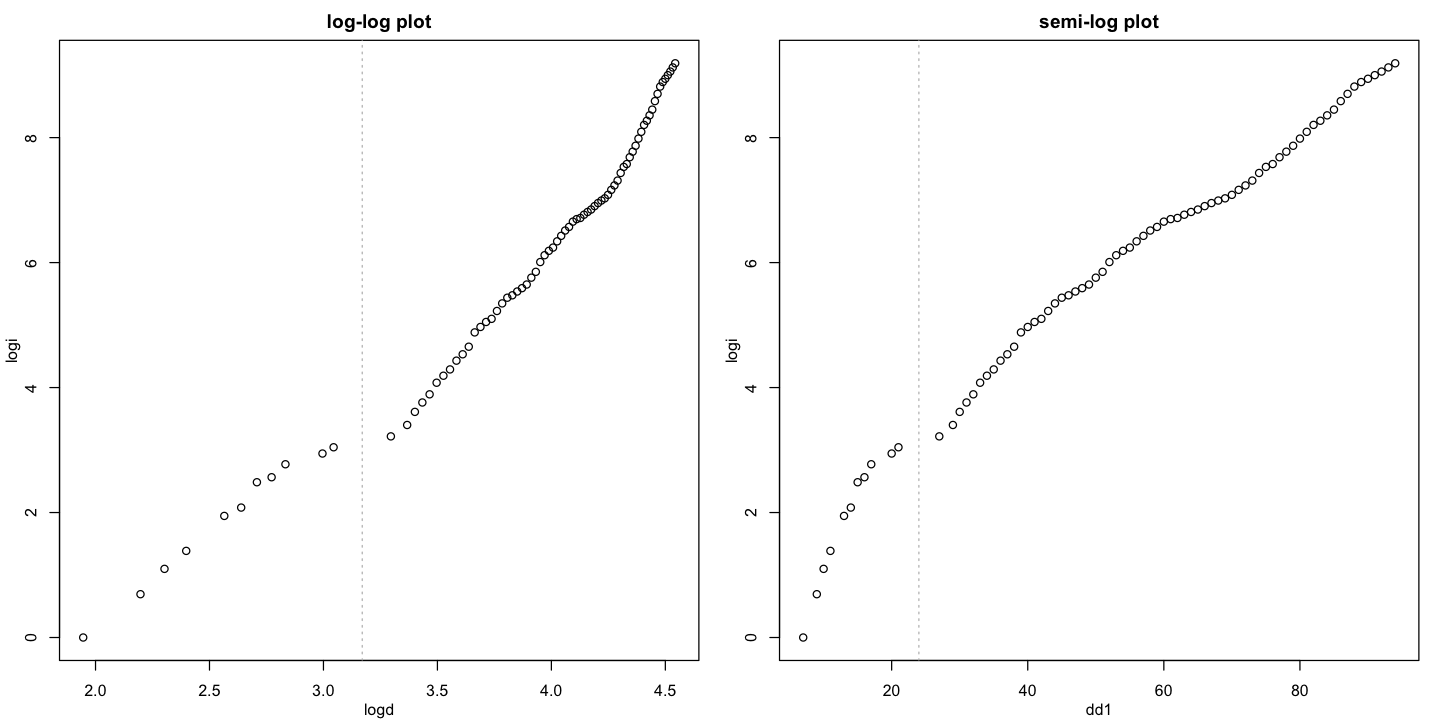

In [7]:
options(repr.plot.width=12, repr.plot.height=6)
par(mfcol=c(1,2))
par.margin("smart")

plot(logd, logi, main="log-log plot")
abline(v=mean(logd[11:12]), lty=3, col=8)
# abline(-2,2,lty=3, col=2)

plot(dd1, logi, main="semi-log plot")
abline(v=mean(dd1[11:12]), lty=3, col=8)
## ... Do you think which looks more linearly?

In [8]:
## Fitting by power. 1, fit for the earlier stage                                                   
model_pow_0 <- lm(logi~logd)
model_pow_0

model_pow_1 <- lm(logi[1:11]~logd[1:11])
model_pow_1

## Fitting by power. 2, fit for the latter stage                                                   
model_pow_2 <- lm(logi[12:nd]~logd[12:nd])
model_pow_2


Call:
lm(formula = logi ~ logd)

Coefficients:
(Intercept)         logd  
     -7.664        3.519  



Call:
lm(formula = logi[1:11] ~ logd[1:11])

Coefficients:
(Intercept)   logd[1:11]  
     -5.562        2.894  



Call:
lm(formula = logi[12:nd] ~ logd[12:nd])

Coefficients:
(Intercept)  logd[12:nd]  
    -12.161        4.608  


We also applided exponential fitting.

Since there seems a significant change in the growth at 2/11 (gray line), we focused on the latter period.

In [9]:
## We focus on the latter growth (D > Feb. 11th)
model_exp_2 <- lm(logi[12:nd]~dd1[12:nd])
model_exp_2
cc_all <- exp(model_exp_2$coefficients[1])
ll_all <- model_exp_2$coefficients[[2]]


Call:
lm(formula = logi[12:nd] ~ dd1[12:nd])

Coefficients:
(Intercept)   dd1[12:nd]  
    1.51909      0.08205  


## Kinki area

First, we apply the linear model, as a initial approximation of the SIR model.

In general, the dynamics of infection is described by the "SIR" model.
$$
\frac{dS}{dt} = -\beta IS \\
\frac{dI}{dt} = \beta IS - \gamma I \\
\frac{dR}{dt} = \gamma I,
$$
where S denotes the population ratio of susceptible, I denotes infected, R denotes recoverd, respectively, and $\beta$ and $\gamma$ are the coefficient of infection and recovery.

Where the growth looks linear in the semi-log prot, we can expect the simplest growth dynamics,

$$
\frac{dI}{dt} = \lambda I \\
I(t) = I_0 \exp(\lambda t) \\
\log(I) = \lambda t + C_0
$$



kinki.jpg 


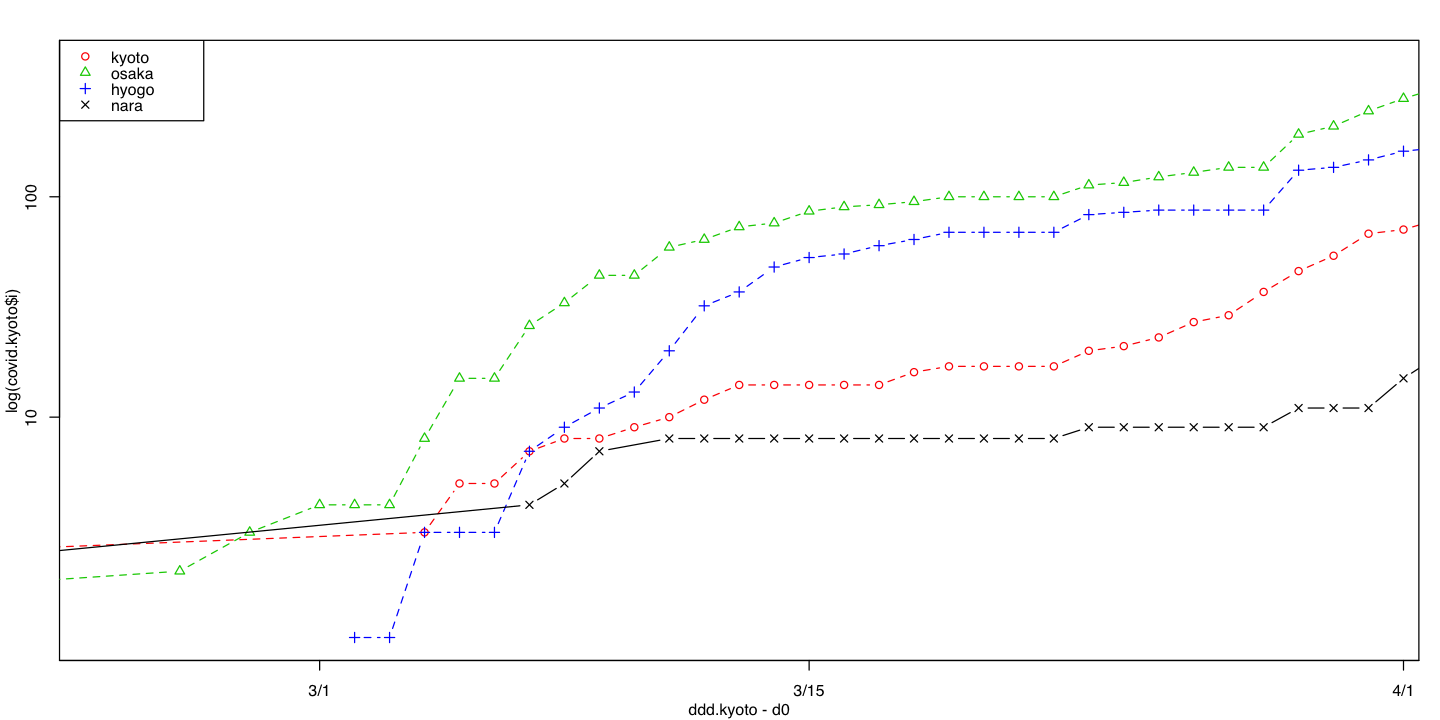

In [10]:
ddd.kyoto <- mdy.date(month=covid.kyoto$mm, day=covid.kyoto$dd, year=covid.kyoto$yy)
ddd.osaka <- mdy.date(month=covid.osaka$mm, day=covid.osaka$dd, year=covid.osaka$yy)
ddd.nara  <- mdy.date(month=covid.nara$mm,  day=covid.nara$dd,  year=covid.nara$yy )
ddd.hyogo <- mdy.date(month=covid.hyogo$mm, day=covid.hyogo$dd, year=covid.hyogo$yy)
logi.nara <- log(covid.nara$i)
plotFigure(function(){
    par.margin("smart")
    plot(  ddd.kyoto-d0, log(covid.kyoto$i), type="b", col=2, lty=2, xlim=c(40,76), ylim=c(0,6), pch=1, axes=FALSE, frame=TRUE)
    points(ddd.osaka-d0, log(covid.osaka$i), type="b", col=3, lty=2, pch=2)
    points(ddd.hyogo-d0, log(covid.hyogo$i), type="b", col=4, lty=2, pch=3)
    points(ddd.nara -d0, log(covid.nara$i ), type="b", col=1, pch=4)
    axis(1,at=ddlabel-d0,labels=ticklabel)
    axis(2,at=log(c(10^(1:5))),labels=c(10^(1:5)))

    legend("topleft", col=c(2,3,4,1), pch=c(1,2,3,4), legend=c("kyoto", "osaka", "hyogo", "nara"))
}, dir="fig", file="kinki", dev=c("x11", "jpg"))

To predict the number of infected people in the nearest two or four weeks, we evaluate the growth of the neighbouring prefectures, in the latest two weeks.

And averaged their growth rate with the weights of their populations to obtain "kinki growth rate".

Since the kinki rate was somehow smaller that of entire Japan, it may be better to estimate by a weighted mean between kinki-rate and total-rate...

In [11]:
dd <- 14
covid3 <- list(kyoto=covid.kyoto, osaka=covid.osaka, nara=covid.nara, hyogo=covid.hyogo)
source3 <- c("kyoto","osaka","hyogo")
lm3 <- list()
ll3 <- numeric(3)
for(aa in 1:3){
    ss <- source3[aa]
    covid_tmp <- covid3[[ss]]

    nd <- nrow(covid_tmp)
    ddd_tmp <- mdy.date(month=covid_tmp$mm, day=covid_tmp$dd, year=covid_tmp$yy)
    xx <- ddd_tmp[(nd-dd):nd]-d0
    yy <- log(covid_tmp$i[(nd-dd):nd])
    tmp <- lm(yy~xx)    
    ll3[aa] <- tmp$coefficients[2]
    lm3[[ss]] <- tmp
}
ll_all <- ll_exp_2[[1]]
ll_all

ll_kinki <- sum(ll3 * population4[c("kyoto", "osaka", "hyogo")]) /sum(population4[c("kyoto", "osaka", "hyogo")])
ll_kinki


ERROR: Error in eval(expr, envir, enclos):  オブジェクト 'll_exp_2' がありません 


In [12]:

tmp  <- optimize(function(par){ mean( (exp((ddd.nara-d0 )*ll_kinki+par) - covid.nara$i )^2)}, c(-5,5))
tmp$minimum


ERROR: Error in mean((exp((ddd.nara - d0) * ll_kinki + par) - covid.nara$i)^2):  オブジェクト 'll_kinki' がありません 


In [13]:
iii <- (nd_nara-6):nd_nara
covid.nara[iii,]

ERROR: Error in eval(expr, envir, enclos):  オブジェクト 'nd_nara' がありません 


In [14]:
nd_nara <- nrow(covid.nara)
iii <- (nd_nara-6):nd_nara
tmp.kinki <- optimize(function(par){ mean( (exp((ddd.nara[iii]-d0 )*ll_kinki+par) - covid.nara$i[iii] )^2)}, c(-5,5))
cc_kinki <- exp(tmp.kinki$minimum)
cc_kinki

tmp.all <- optimize(function(par){ mean( (exp((ddd.nara[iii]-d0 )*ll_all+par) - covid.nara$i[iii] )^2)}, c(-5,5))
cc_all <- exp(tmp.all$minimum)
cc_all

ERROR: Error in mean((exp((ddd.nara[iii] - d0) * ll_kinki + par) - covid.nara$i[iii])^2):  オブジェクト 'll_kinki' がありません 


ERROR: Error in abline(log(cc_kinki), ll_kinki, lty = 2):  オブジェクト 'cc_kinki' がありません 


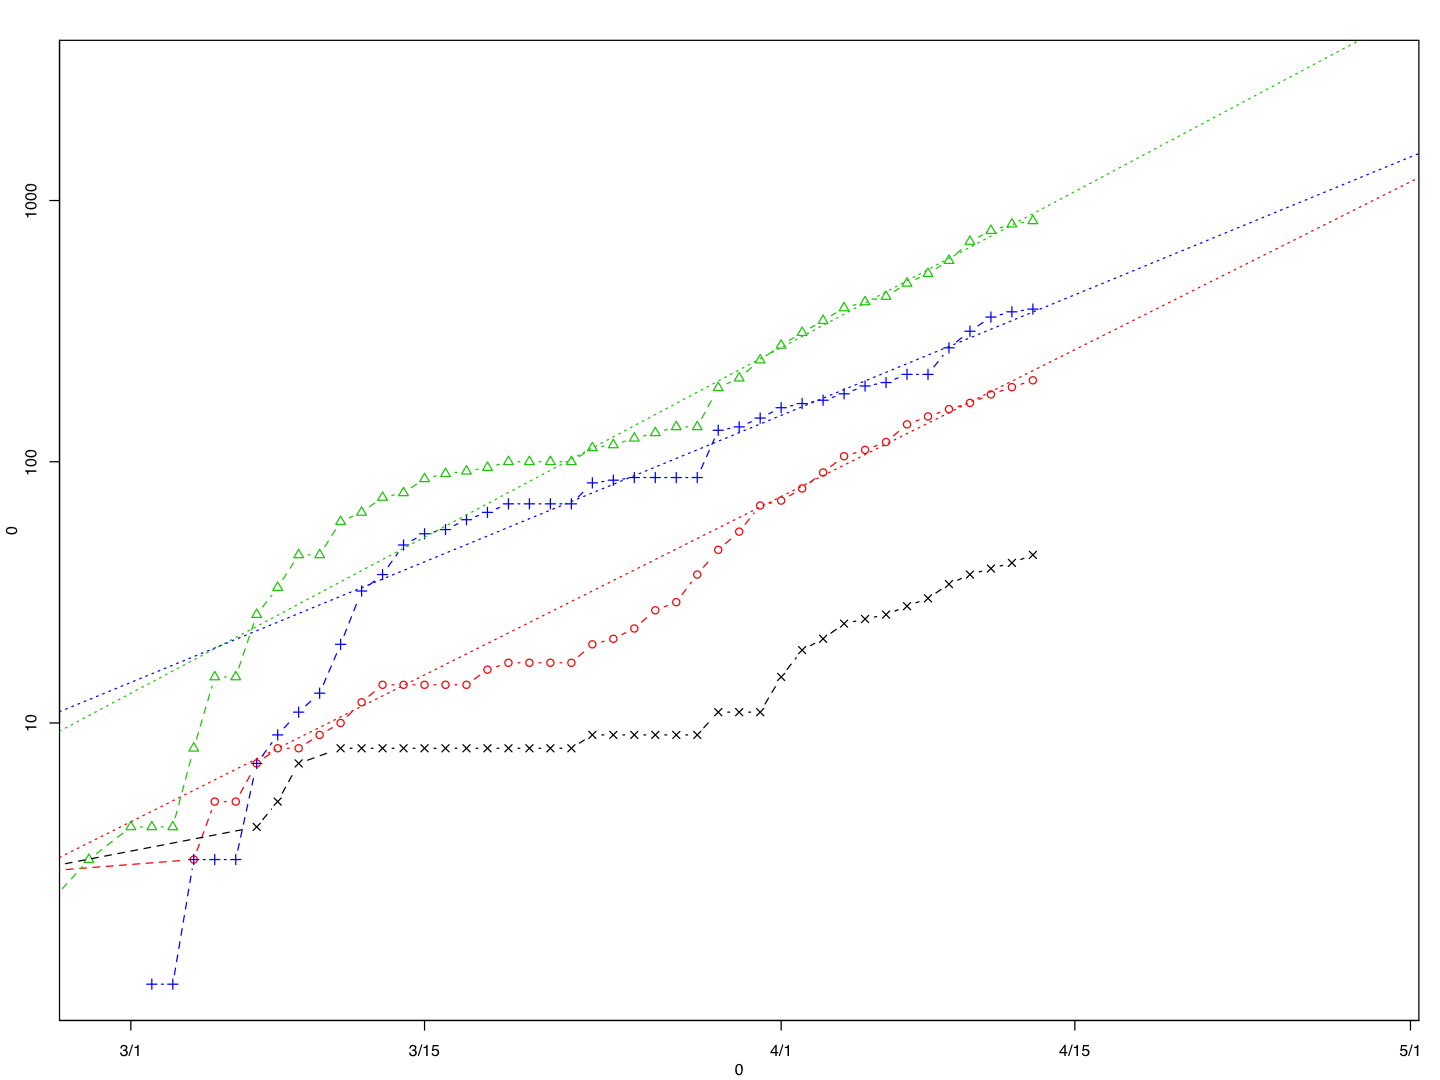

In [15]:
options(repr.plot.width=12, repr.plot.height=9)

plotFigure(function(){
    par.margin("smart")
    plot(0, 0, type="n", xlim=c(45,105), ylim=c(0,8), pch=1, axes=FALSE, frame=TRUE)
    points(ddd.kyoto-d0, log(covid.kyoto$i), type="b", col=2, lty=2, pch=1)
    points(ddd.osaka-d0, log(covid.osaka$i), type="b", col=3, lty=2, pch=2)
    points(ddd.hyogo-d0, log(covid.hyogo$i), type="b", col=4, lty=2, pch=3)
    points(ddd.nara -d0, log(covid.nara$i ), type="b", col=1, lty=2, pch=4)
    axis(1,at=ddlabel-d0,labels=ticklabel)
    axis(2,at=log(c(10^(1:5))),labels=c(10^(1:5)))
    abline(lm3[["kyoto"]],col=2,lty=3)
    abline(lm3[["osaka"]],col=3,lty=3)
    abline(lm3[["hyogo"]],col=4,lty=3)
    abline(log(cc_kinki), ll_kinki, lty=2)
    abline(log(cc_total), ll_exp_2, lty=3)
    legend("topleft", col=c(2,3,4,1), pch=c(1,2,3,4), legend=c("kyoto", "osaka", "hyogo", "nara"))
},rr=1.5, dir="fig", file="kinki", dev=c("x11", "jpg"))

Using the estimated growth rate, we can compute the population coefficient of the exponential curve.

In [16]:
exp(ll_all)
exp(ll_kinki)

log(2) / (ll_all)
log(2) / (ll_kinki)

[1] 1.085512

ERROR: Error in eval(expr, envir, enclos):  オブジェクト 'll_kinki' がありません 


And use the parameters to predict growth in this two to four weeks.

In [17]:
# prediction of number of infected
## dates to plot ticks                                                                                    
mdlabel <- rbind(c(4,15),
                 c(4,21),
                 c(5, 1),
                 c(5, 7),
                 c(5,15))
                 
ddlabel <- apply(mdlabel,1,function(xx){
    mdy.date(xx[1],xx[2],2020)
})

pred.nara1 <- pred_exp(ddlabel-d0, cc_kinki, ll_kinki)
recover.nara1 <- pred_exp(ddlabel-d0-12, cc_kinki, ll_kinki)
hoge <- cbind(mdlabel, pred.nara1, recover.nara1, pred.nara1-recover.nara1)
colnames(hoge) <- c("MM","DD","Infected","Recovered","Hospitalized")
print(round(hoge))

pred.nara2 <- pred_exp(ddlabel-d0, cc_all, ll_all)
recover.nara2 <- pred_exp(ddlabel-d0-12, cc_all, ll_all)

hoge <- cbind(mdlabel, pred.nara2, recover.nara2, pred.nara2-recover.nara2)
colnames(hoge) <- c("MM","DD","Infected","Recovered","Hospitalized")
print(round(hoge))

ERROR: Error in pred_exp(ddlabel - d0, cc_kinki, ll_kinki):  オブジェクト 'cc_kinki' がありません 


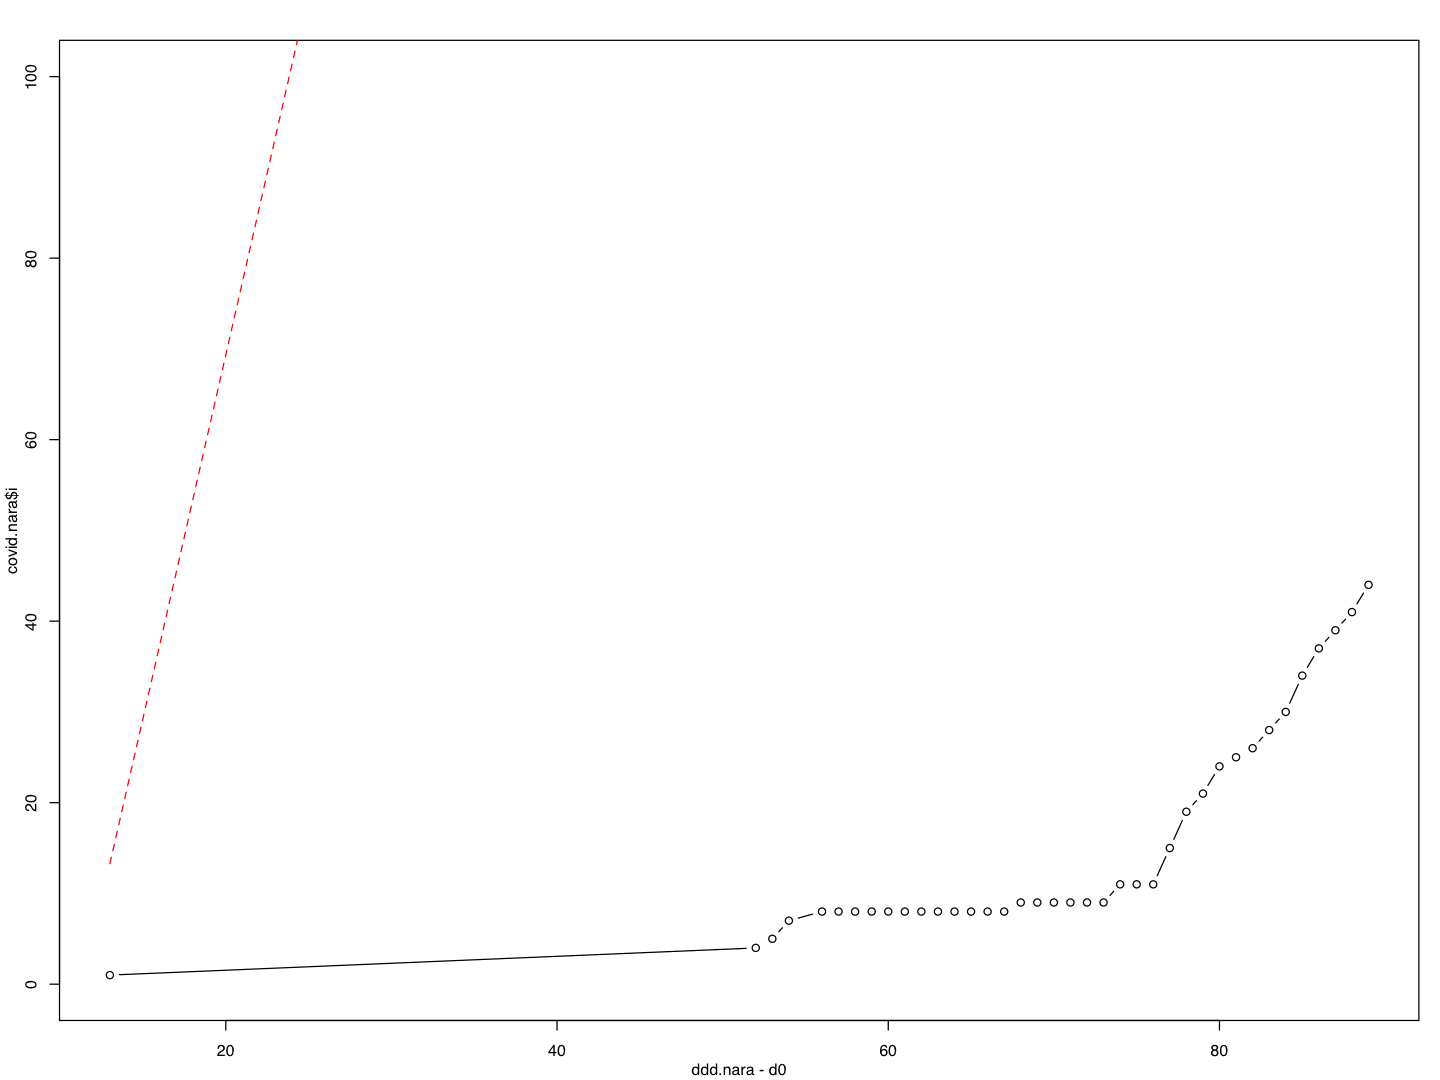

In [18]:
pred.nara <- pred_exp(ddd.nara-d0, cc_all, ll_all)

plotFigure(function(){
    plot(ddd.nara-d0, covid.nara$i, ylim=c(0,100), type="b")
    points(ddd.nara-d0, pred.nara, type="l",lty=2,col=2)    
})


## Pref 47 table

In [32]:
pref47.infected <- read.delim("data/pref47.infected.txt", header=TRUE, sep="\t")
pref47.recovered <- read.delim("data/pref47.recovered.txt", header=TRUE, sep="\t")

## Note that the date in the pref* table are not the date when they published but the date when they are accumulated.
## We prefer to use the date of publised, so add one day to the date.p47

date.p47 <- mdy.date(month=pref47.infected$Month, day=pref47.infected$Day, year=2020)+1  
d0.p47  <- date.p47[1]
ddd.p47 <- date.p47-d0.p47 ## relative date starting from 2020/01/15                                                   


In [33]:
## dates to plot ticks                                                                                    
mdlabel <- rbind(c(1,15),
                 c(2, 1),
                 c(2,15),
                 c(3, 1),
                 c(3,15),
                 c(4, 1),
                 c(4,15),
                 c(5, 1),
                 c(5,15),
                 c(6, 1),
                 c(6,15),
                 c(7, 1),
                 c(7,15)
                )
ddlabel <- apply(mdlabel,1,function(xx){
    mdy.date(xx[1],xx[2],2020)
})
## label to plot ticks                                                                                    
ticklabel <- apply(mdlabel,1,paste,collapse="/")

In [34]:
library(rjson)
pref47_ja <- fromJSON(file="data/jisx0401-ja.json")
pid <- 1:47
names(pid) <- unlist(pref47_ja)
pref47 <- fromJSON(file="data/jisx0401-en.json")

In [35]:
kinki4 <- c("京都府","大阪府","兵庫県","奈良県")
pj_kinki4 <- pid[kinki4]

nd <- nrow(pref47.infected)

pj <- pj_kinki4[[1]]
model_kinki4 <- lapply(1:4,function(aa){
    pref <- kinki4[aa]
    pj <- pid[pref]
    xxx_tmp <- ddd.p47[(nd-13):nd]
    yyy_tmp <- log(pref47.infected[(nd-13):nd,pj+2])
    model_infected <- lm(yyy_tmp~xxx_tmp)
    yyy_tmp <- log(pref47.recovered[(nd-13):nd,pj+2])
    model_recovered <- lm(yyy_tmp~xxx_tmp)
    return(list(model_infected,model_recovered))
})
names(model_kinki4) <- kinki4



In [36]:
pref <- kinki4[[4]]
pj <- pid[pref]
xxx_tmp <- ddd.p47[(nd-13):nd]
yyy_tmp <- log(pref47.infected[(nd-13):nd,pj+2])
tmp <- optimize(function(par){ mean((yyy_tmp-xxx_tmp*ll_all-par)^2)}, c(-5,5))
cc_nara <- tmp$minimum[[1]]
c(cc_nara, ll_all[[1]])

[1] 2.64850436 0.08205163

In [37]:
model_kinki4[[4]][[1]]


Call:
lm(formula = yyy_tmp ~ xxx_tmp)

Coefficients:
(Intercept)      xxx_tmp  
    2.79766      0.07012  


kinki4_20200418.jpg 


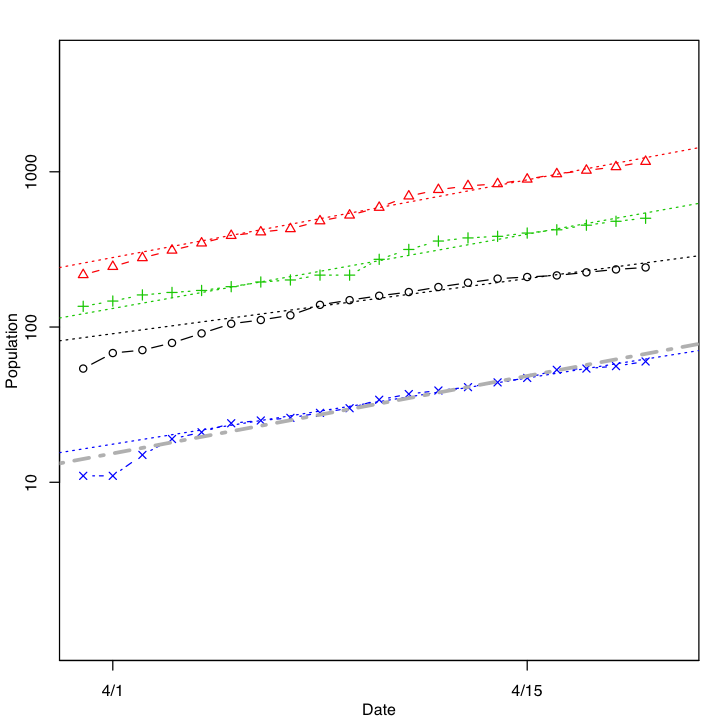

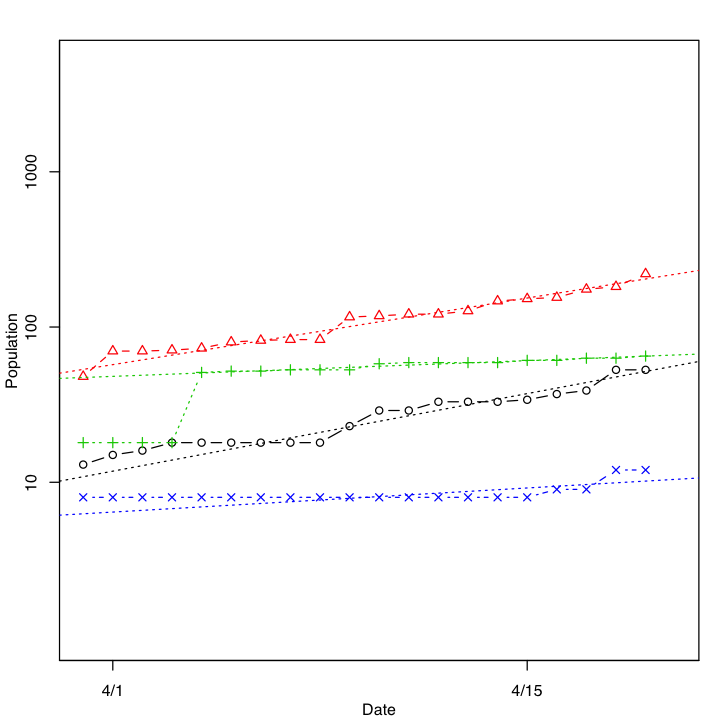

In [40]:
options(repr.plot.width=6, repr.plot.height=6)

plotFigure(function(){
    matplot(ddd.p47, log(pref47.infected[,pj_kinki4+2]),type="b",pch=1:4, xlim=c(0,20), ylim=log(c(1,5000)),axes=FALSE, frame=TRUE, ylab="Population", xlab="Date")
    axis(1,at=ddlabel-d0.p47,labels=ticklabel)
    axis(2,at=log(c(10^(1:5))),labels=c(10^(1:5)))
    for(aa in 1:4){
        pref <- kinki4[aa]
        abline(model_kinki4[[pref]][[1]], lty=3, col=aa)        
    }
    abline(cc_nara, ll_all, lty=4, col=8, lwd=3)
},dir="fig",file=paste("kinki4_",stamp,sep=""),dev=c("x11","jpg"))

plotFigure(function(){
    matplot(ddd.p47, log(pref47.recovered[,pj_kinki4+2]),type="b",pch=1:4, xlim=c(0,20), ylim=log(c(1,5000)),axes=FALSE, frame=TRUE, ylab="Population", xlab="Date")
    axis(1,at=ddlabel-d0.p47,labels=ticklabel)
    axis(2,at=log(c(10^(1:5))),labels=c(10^(1:5)))
    for(aa in 1:4){
        pref <- kinki4[aa]
        abline(model_kinki4[[pref]][[2]], lty=3, col=aa)        
    }
})


In [39]:
model_kinki4

$京都府
$京都府[[1]]

Call:
lm(formula = yyy_tmp ~ xxx_tmp)

Coefficients:
(Intercept)      xxx_tmp  
     4.4476       0.0584  


$京都府[[2]]

Call:
lm(formula = yyy_tmp ~ xxx_tmp)

Coefficients:
(Intercept)      xxx_tmp  
    2.38516      0.08217  



$大阪府
$大阪府[[1]]

Call:
lm(formula = yyy_tmp ~ xxx_tmp)

Coefficients:
(Intercept)      xxx_tmp  
    5.55358      0.08231  


$大阪府[[2]]

Call:
lm(formula = yyy_tmp ~ xxx_tmp)

Coefficients:
(Intercept)      xxx_tmp  
    3.97683      0.07057  



$兵庫県
$兵庫県[[1]]

Call:
lm(formula = yyy_tmp ~ xxx_tmp)

Coefficients:
(Intercept)      xxx_tmp  
    4.80208      0.07872  


$兵庫県[[2]]

Call:
lm(formula = yyy_tmp ~ xxx_tmp)

Coefficients:
(Intercept)      xxx_tmp  
    3.85674      0.01669  



$奈良県
$奈良県[[1]]

Call:
lm(formula = yyy_tmp ~ xxx_tmp)

Coefficients:
(Intercept)      xxx_tmp  
    2.79766      0.07012  


$奈良県[[2]]

Call:
lm(formula = yyy_tmp ~ xxx_tmp)

Coefficients:
(Intercept)      xxx_tmp  
    1.83508      0.02553  




In [27]:
as.vector(model_kinki4[[4]][[1]]$coefficients)
ll_nara <- model_kinki4[[4]][[1]]$coefficients[[2]]

c(cc_nara, ll_all)

exp(ll_nara)
exp(ll_all)

log(2) / model_kinki4[[4]][[1]]$coefficients[2]
log(2) / ll_all


[1] 2.79765688 0.07011943

[1] 2.64850436 0.08205163

[1] 1.072636

[1] 1.085512

xxx_tmp 
9.885238

[1] 8.447696

In [28]:
mmdd_tmp <- rbind(c(4, 1),
                  c(4, 7),
                  c(4,15),
                  c(4,21),
                  c(5, 1),
                  c(5, 7),
                  c(5,15))
colnames(mmdd_tmp) <- c("Month","Day")
ddd_tmp <- apply(mmdd_tmp,1,function(xx){
    mdy.date(xx[1],xx[2],2020) - d0.p47
})

predict_kinki <- function(model, dd){
    bb <- model$coefficients[1]
    aa <- model$coefficients[2]
    return(round(exp(aa*dd+bb)))
}
# pref47.infected[,pid["奈良県"]+2]
predicted1 <- predict_kinki(model_kinki4[[4]][[1]],ddd_tmp)
recovered1 <- predict_kinki(model_kinki4[[4]][[1]],ddd_tmp-12)
cbind(mmdd_tmp, Predicted=predicted1, Recovered=recovered1, predicted1-recovered1)

# pref47.infected[,pid["奈良県"]+2]
predicted2 <- round(exp(ddd_tmp*ll_all+cc_nara))
recovered2 <- round(exp((ddd_tmp-12)*ll_all+cc_nara))
cbind(mmdd_tmp, Predicted=predicted2, Recovered=recovered2, predicted2-recovered2)

Month,Day,Predicted,Recovered,
4,1,18,8,10
4,7,27,12,15
4,15,47,20,27
4,21,72,31,41
5,1,144,62,82
5,7,220,95,125
5,15,385,166,219


Month,Day,Predicted,Recovered,
4,1,15,6,9
4,7,25,9,16
4,15,48,18,30
4,21,79,30,49
5,1,180,67,113
5,7,294,110,184
5,15,567,212,355


## SEIR model

We assume a modified SEIR model. S: susceptible, E: exposed but not show symptoms yet, I: infected and separeted in a hospital, R: recovered and no more susceptible.

$$
\frac{dS}{dt} = -\alpha E S /N \\
\frac{dE}{dt} = \alpha E S/N - \beta E - \gamma E\\
\frac{dI}{dt} = \beta E - \gamma I \\
\frac{dR_E}{dt} = \gamma E, \\
\frac{dR_I}{dt} = \gamma I,
$$
where $N$ is the population of the country (Nara), $\alpha$ is an infection rate, $\beta$ is an onset rate, $\gamma$ is a recover rate.

In [29]:
e0 <- 30
i0 <- 10
r0 <- 0
par <- c(alpha=alpha, beta=alpha-gamma-ll_tmp, gamma=gamma, nn=1348e+3)

ERROR: Error in eval(expr, envir, enclos):  オブジェクト 'alpha' がありません 


In [30]:
1/par[3]

ERROR: Error in par[3]:  'closure' 型のオブジェクトは部分代入可能ではありません 


In [31]:
nd <- 365
sst <- numeric(nd)
eet <- numeric(nd)
iit <- numeric(nd)
ret <- numeric(nd)
rit <- numeric(nd)
dit <- numeric(nd)

alpha <- par[1]
beta  <- par[2]
gamma <- par[3]
nn <- par[4]

ss <- nn
ee <- 100
ii <- 50
re <- 16
ri <- 16


ERROR: Error in par[1]:  'closure' 型のオブジェクトは部分代入可能ではありません 


Construct a simulator using poison and binomial random growth.

In [855]:
simSEIR <- function(nd, par){
    sst <- numeric(nd)
    eet <- numeric(nd)
    iit <- numeric(nd)
    ret <- numeric(nd)
    rit <- numeric(nd)
    dit <- numeric(nd)

    alpha <- par[1]
    beta  <- par[2]
    gamma <- par[3]
    nn <- par[4]

    ss <- nn
    ee <- 32
    ii <- 59
    re <- 16
    ri <- 16
    for(dd  in 1:nd){
        t1 <- rpois(1, ss/nn*ee*alpha)
        t2 <- rbinom(1, ee, beta)
        t3 <- rbinom(1, ee, gamma)
        t4 <- rbinom(1, ii, gamma)
        ss <- ss - t1
        ee <- ee + t1 - t2 - t3
        if(ee <= 0){
            ss <- ss - (1-ee)
            ee <- 1
        }
        ii <- ii + t2 - t4
        re <- re + t3
        ri <- ri + t4
        sst[dd] <- ss
        eet[dd] <- ee
        dit[dd] <- t2-t4
        iit[dd] <- ii
        ret[dd] <- re
        rit[dd] <- ri
    }    
    return(cbind(sst=sst,eet=eet,iit=iit,ret=ret,rit=rit,dit=dit))
}

In [888]:
alpha <- 0.42
gamma <- 1/38
alpha <- exp(tmp$par[1])
gamma <- exp(tmp$par[2])
sim.total <- simSEIR(365, par=c(alpha=alpha, beta=alpha-gamma-ll_tmp, gamma=gamma, nn=1e+8))

We will optimize the model parameter alpha and gamma, using the number of infected and recovered of total Japan in the period between 2/17 to 4/1.

The loss is defined by mean squared error of the number of infected and recovered population.

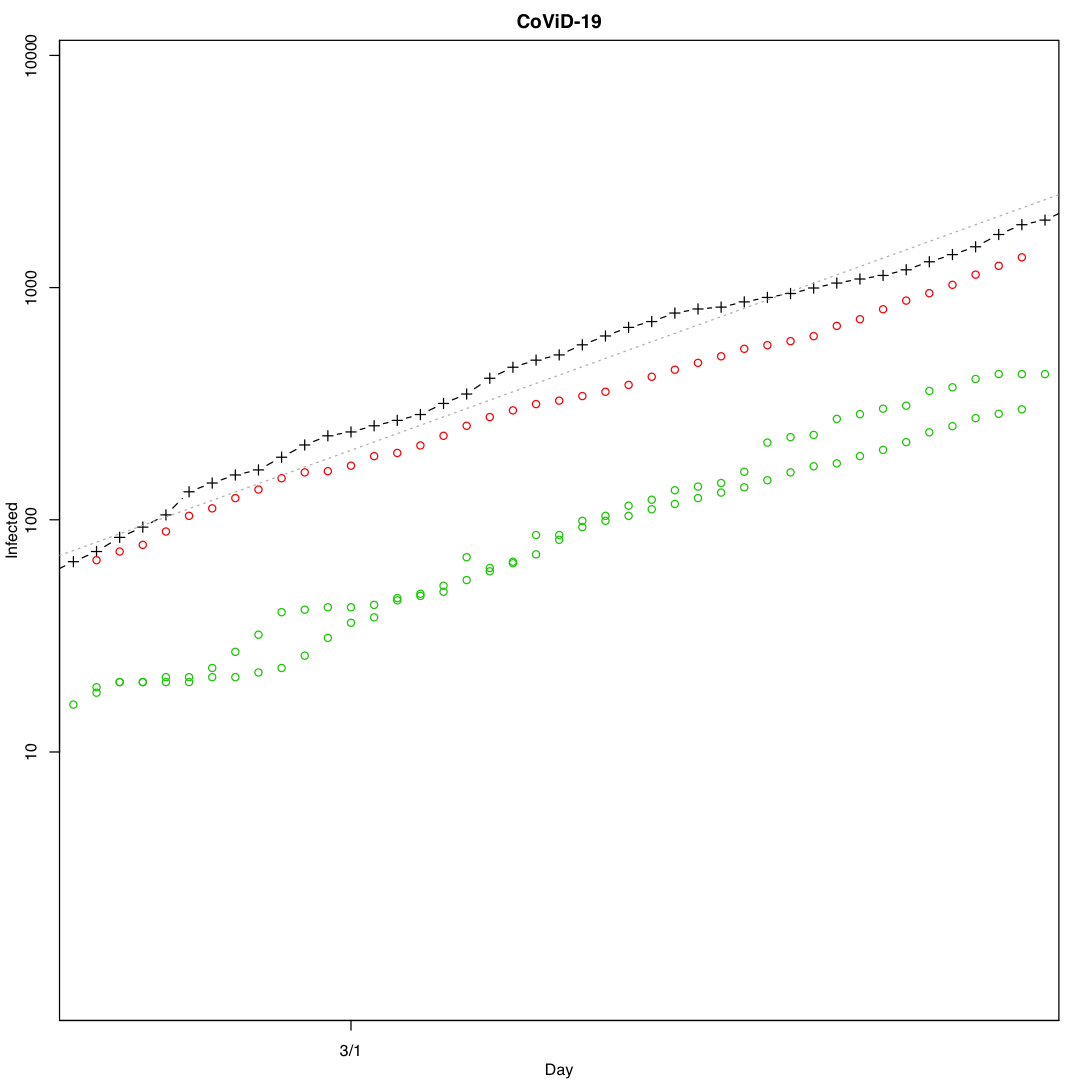

In [889]:
options(repr.plot.width=9, repr.plot.height=9)

plotFigure(function(){
    plot(dd1, logi, axes=FALSE, frame=TRUE, type="b", lty=2, pch=3,
         xlim=c(35,75),ylim=c(0,9), xlab="Day", ylab="Infected", main="CoViD-19")
    points(dd1, log(covid$re), pch=1, col=3)

    points(35:75, log(sim.total[1:41,"iit"]), pch=1, col=2)
    points(35:75, log(sim.total[1:41,"rit"]), pch=1, col=3)
    
    axis(1,at=ddlabel-d0,labels=ticklabel)
    axis(2,at=log(c(10^(1:5))),labels=c(10^(1:5)))
    abline(model_exp_2, lty=3, col=8)
},rr=1.5,dir="fig",file=file_plot1,dev=c("x11"))


In [885]:
iii <- which(dd1 >= 33 & dd1 <= 75)
length(iii)
loss <- function(tmp){
    mean((log(covid$i[iii]) - log(tmp[1:length(iii),"iit"]))^2) + mean((log(covid$re[iii]) - log(tmp[1:length(iii),"rit"]))^2)
}
loss(sim.total)

[1] 43

[1] 0.2172745

Since the simulation is uses random variables and depends on initial growth drastically, we evaluated the loss using N=300 sample simulations with the same parameters.

In [943]:
lossn <- function(par, nl){
    iii <- which(dd1 >= 33 & dd1 <= 75)
    alpha <- exp(par["alpha"])
    gamma <- exp(par["gamma"])
    beta  <- alpha-gamma-ll_tmp
    nn <- 1e+8

    lll <- sapply(1:nl,function(par){
        sim.tmp <- simSEIR(365, par=c(alpha=alpha, beta=alpha-gamma-ll_kinki, gamma=gamma, nn=1e+8))
        loss(sim.tmp)
    })
    return(mean(lll))
}

In [944]:
lossn(c(alpha=log(0.42), gamma=log(1/38)), 300)

[1] 0.3326153

Now we can optimize alpha and gamma.

Beta is determined from alpha and gamma since we evaluated exponential growth of infected population.

Namely, when $E, I, R \ll N$, the growth will be $\lambda \simeq \alpha-\beta-\gamma$

In [945]:
tmp.sim <- optim(c(alpha=log(0.42), gamma=log(1/38)), function(par){lossn(par, 300)})
tmp.sim

$par
    alpha     gamma 
-1.049813 -4.003371 

$value
[1] 0.1514313

$counts
function gradient 
     301       NA 

$convergence
[1] 10

$message
NULL

In [971]:
alpha <- exp(tmp.sim$par[1])
gamma <- exp(tmp.sim$par[2])

beta <- alpha-gamma-ll_tmp
c(alpha, beta, gamma)
1/gamma[[1]]

alpha      alpha      gamma 
0.35000326 0.26117754 0.01825401

[1] 54.7825

The estimated recovery rate seems rather small compared with stay in the hospitals.

Show the prediction of entire Japan.

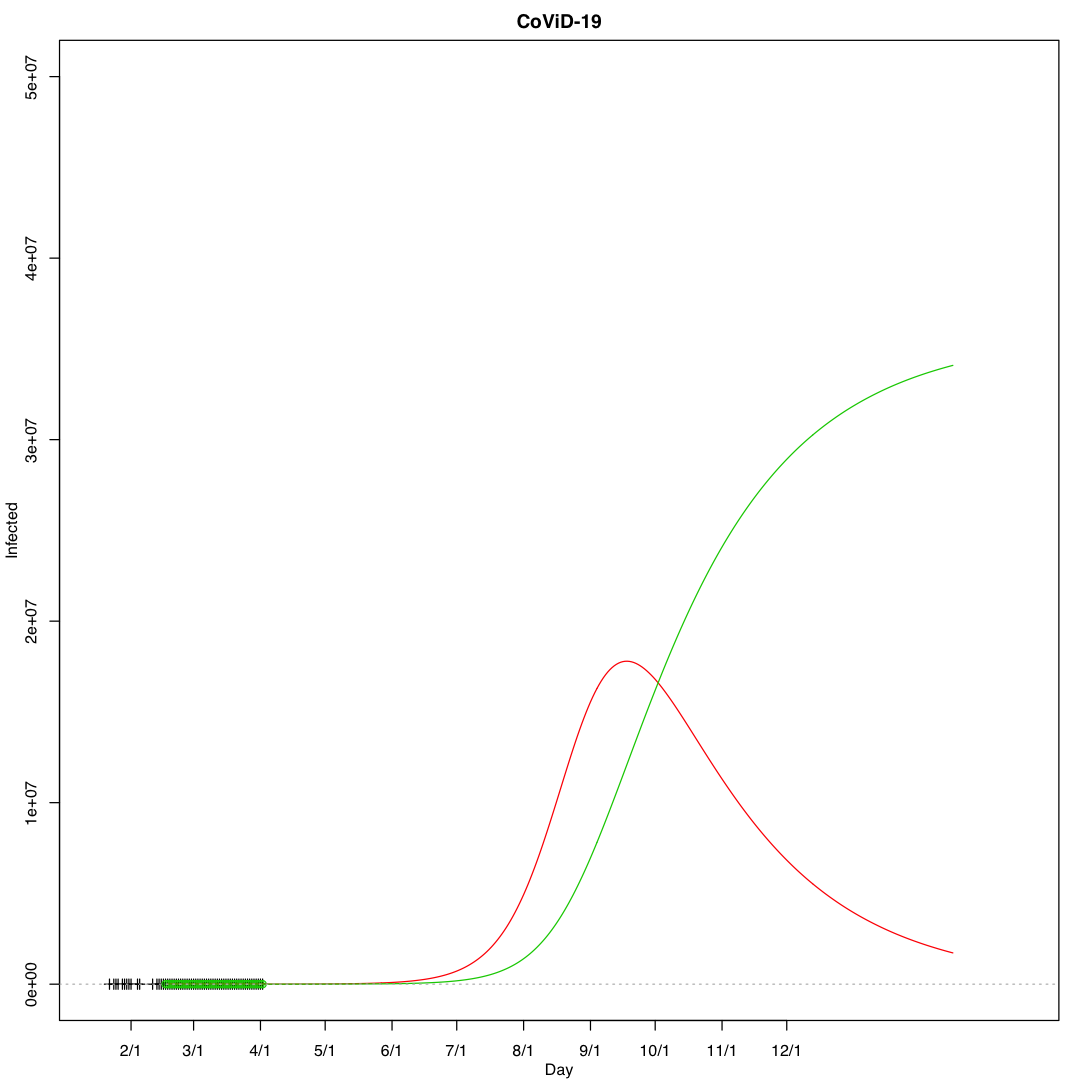

In [909]:
plotFigure(function(){
    plot(dd1, covid$i, axes=FALSE, frame=TRUE, type="b", lty=2, pch=3, xlim=c(1,430), ylim=c(0,5e+7),
         xlab="Day", ylab="Infected", main="CoViD-19")
    points(dd1, covid$re, pch=1, col=3)

    points(1:365+33,(sim.total[,"iit"]), pch=1, col=2,type="l")
    points(1:365+33,(sim.total[,"rit"]), pch=1, col=3,type="l")
    
    axis(1,at=ddlabel-d0,labels=ticklabel)
    axis(2)
    abline(model_exp_2, lty=3, col=8)
},rr=1.5,dir="fig",file=file_plot1,dev=c("x11"))

In [987]:
max(sim.total[,"iit"])
which.max(sim.total[,"iit"])+d0+33


[1] 17792976

[1] 18Sep2020

## Nara 
Simulate dynamics of infection and recovery in Nara.

In [ ]:
hoge <- simSEIR(365, par=c(alpha=alpha, beta=alpha-gamma-ll_kinki, gamma=gamma, nn=1348e+3))


sim1.jpg 


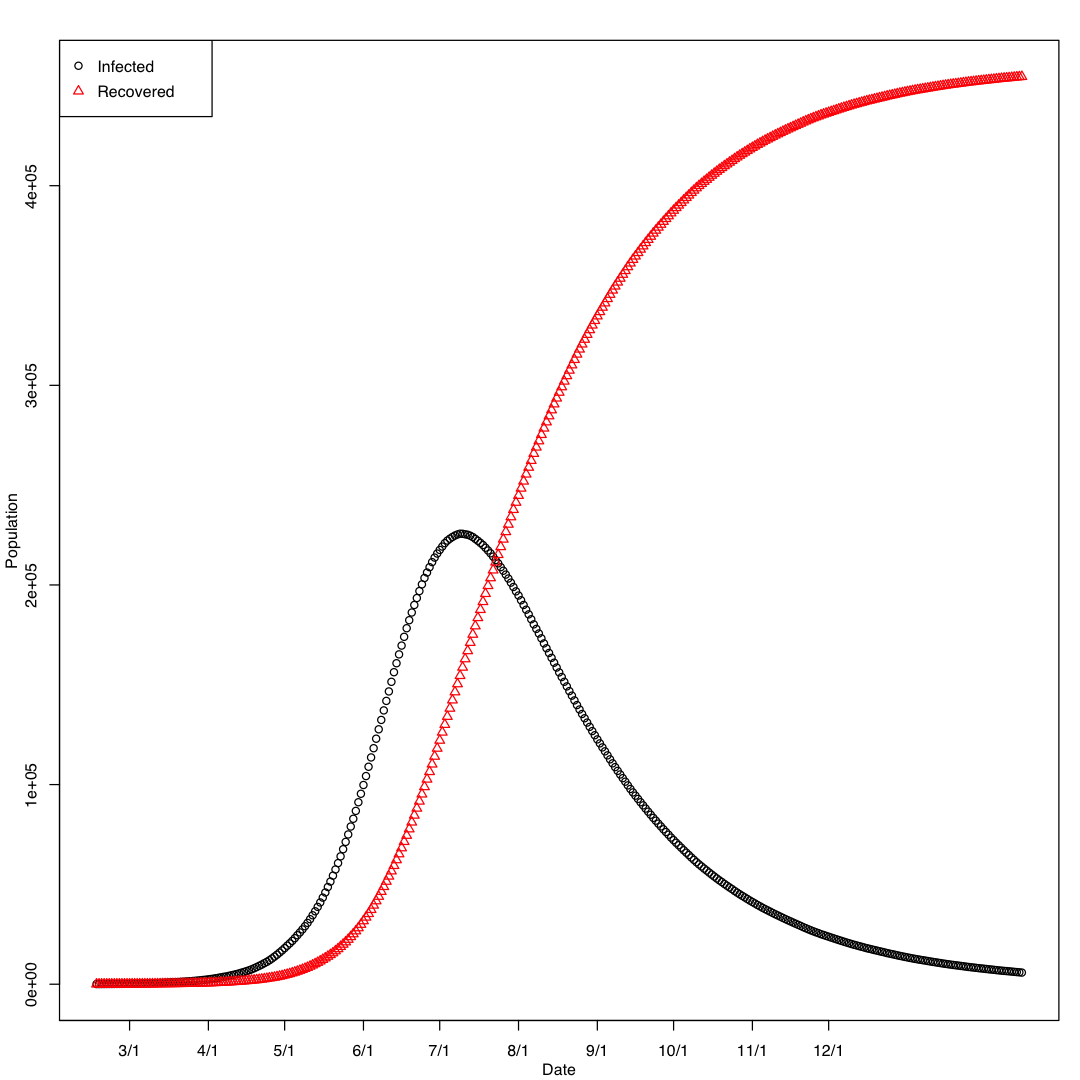

In [1017]:
mdlabel <- rbind(c(2, 1),
                 c(3, 1),
                 c(4, 1),
                 c(5, 1),
                 c(6, 1),
                 c(7, 1),
                 c(8, 1),
                 c(9, 1),
                 c(10, 1),
                 c(11, 1),
                 c(12, 1)
                )
ddlabel <- apply(mdlabel,1,function(xx){
    mdy.date(xx[1],xx[2],2020)
})
## label to plot ticks                                                                                    
ticklabel <- apply(mdlabel,1,paste,collapse="/")

plotFigure(function(){
    matplot(33:(32+365), hoge[,c("iit","rit")], type="b", pch=1:4, axes=FALSE, frame=TRUE, lty=3, xlab="Date",ylab="Population")
    axis(1,at=ddlabel-d0,labels=ticklabel)
    axis(2)
    legend("topleft",legend=c("Infected","Recovered"),pch=1:2, col=1:2)
}, rr=1.5, dir="fig", file="sim1", dev=c("x11","jpg"))

Since the simulation depends on random variables, compute 100 random samples to see the variation of the prediction.

In [984]:
alpha <- exp(tmp.sim$par[1])
gamma <- exp(tmp.sim$par[2])

sim100 <- sapply(1:100,function(nn){
    hoge <- simSEIR(365, par=c(alpha=alpha, beta=alpha-gamma-ll_kinki, gamma=gamma, nn=1348e+3))
    return(hoge[,"iit"])
})


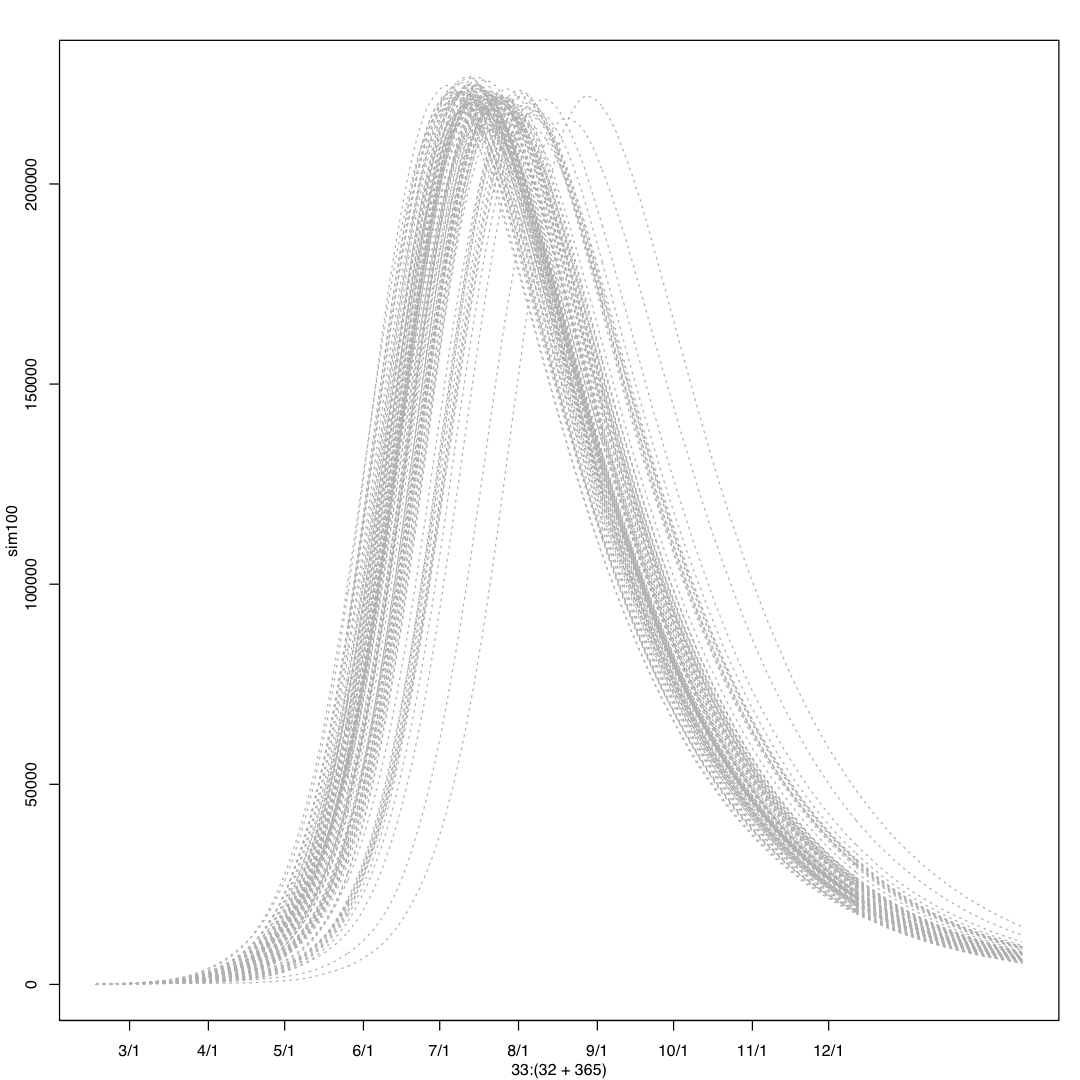

In [985]:
plotFigure(function(){
    matplot(33:(32+365), sim100, type="l", axes=FALSE, frame=TRUE, lty=3, col=8)
    axis(1,at=ddlabel-d0,labels=ticklabel)
    axis(2)
})

Histgram of the peak hieght and date of the peak.

hist.jpg 


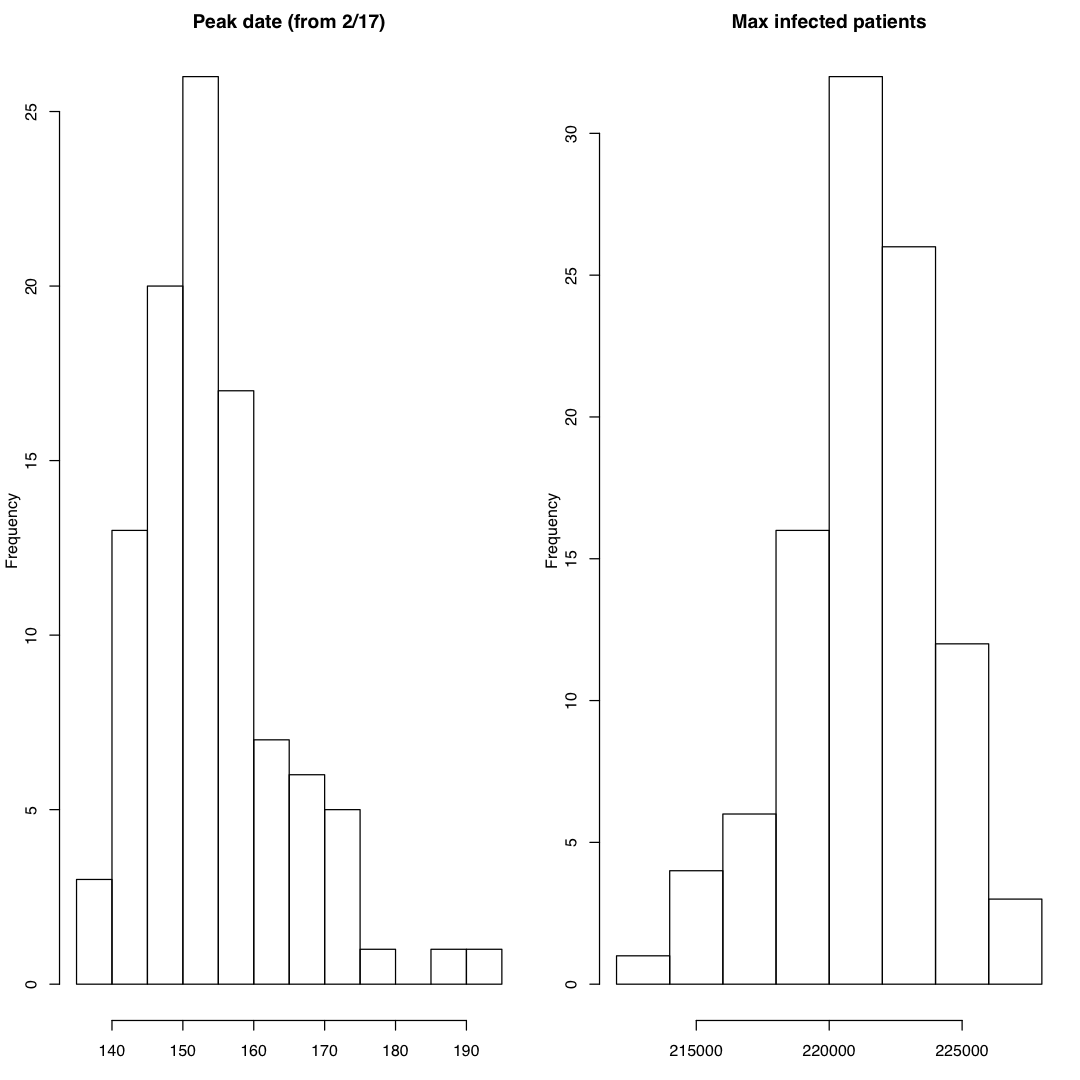

In [1020]:
plotFigure(function(){
    hist(apply(sim100,2,which.max),br=8, main="Peak date (from 2/17)",xlab=NA)
    hist(apply(sim100,2,max),br=8, main="Max infected patients", xlab=NA)
},np=2,rx=3,ry=1.5,dir="fig",file="hist",dev=c("x11","jpg"))
dmax <- median(apply(sim100,2,which.max))
abline(v=dmax, lty=3, col=8)

In [954]:
infmax <- apply(sim100,2,max)
mean(infmax)
sd(infmax)

[1] 221254.8

[1] 2774.532

In [955]:
daymax <- apply(sim100,2,which.max)
mean(daymax)
sd(daymax)

[1] 152.46

[1] 9.605785

In [956]:
dmax 
dmax + d0 + 33

[1] 151

[1] 17Jul2020

In [957]:
xxx <- 1:30
yyy <- log(sim100[1:30,1])
lm(yyy~xxx)


Call:
lm(formula = yyy ~ xxx)

Coefficients:
(Intercept)          xxx  
     4.1995       0.0818  


In [1022]:
exp(-0.0675059717400305*12)

[1] 0.4448262